# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [4]:
import pandas as pd
import numpy as np

from random import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Shape: (5000, 5)
Количество пропусков 0
Количество дубликатов 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


array([[<Axes: title={'center': 'Пол'}>,
        <Axes: title={'center': 'Возраст'}>],
       [<Axes: title={'center': 'Зарплата'}>,
        <Axes: title={'center': 'Члены семьи'}>],
       [<Axes: title={'center': 'Страховые выплаты'}>, <Axes: >]],
      dtype=object)

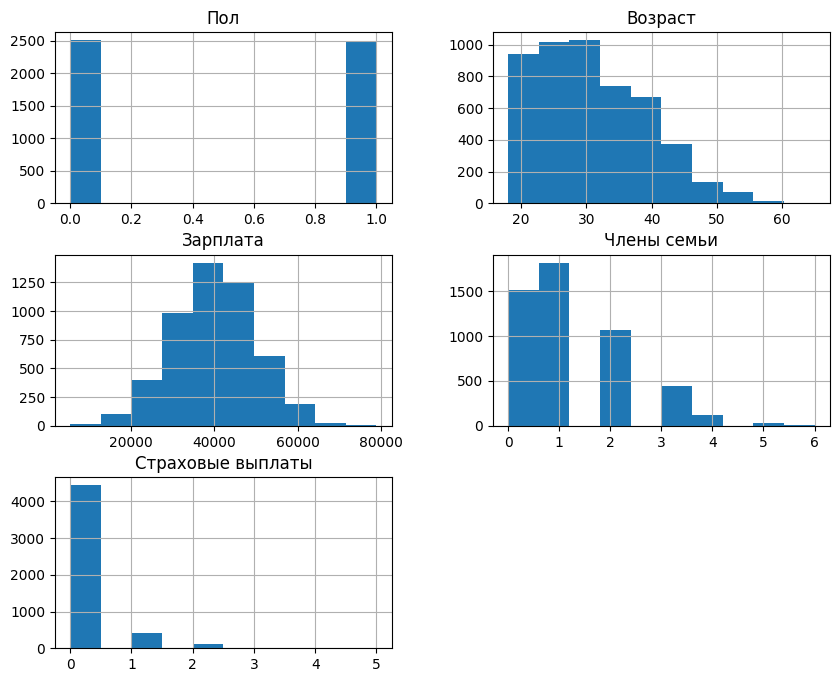

In [6]:
print('Shape:', df.shape)
print('Количество пропусков', df.isna().sum().sum())
print('Количество дубликатов', df.duplicated().sum())
display(df.describe())
df.hist(figsize=(10, 8))

В данных есть дубликаты. Возможно, это просто клиенты с одинаковыми признаками. Оставим их.

## Умножение матриц

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**   при умножении на обратимую матрицу качество модели не изменится - значение метрики остаётся прежним.

Используем свойства:   
$$
(AB)^T=B^T A^T  
$$

$$
(AB)^{-1}=B^{-1} A^{-1}  
$$

$$
AA^{-1}=A^{-1} A=E  
$$

$$
AE=EA=A
$$

**Обоснование:**   
Умножим матрицу признаков $X$ на cлучайную обратимую матрицу $P$:  

$$
wp = ((XP)^T XP)^{-1} (XP)^Ty
$$

Раскроем произведения в скобках:  

$$
wp = (P^T X^T XP)^{-1} P^T X^Ty
$$

Представим произведение в скобках как произведение 3х матриц:

$$
wp = (P^T (X^T X) P)^{-1} P^T X^Ty
$$

Раскроем скобки:  

$$
wp = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^Ty
$$

Видим $(P^T)$ и $P^T$, тк матрица обратимая, то их произведение равно единичной матрице:

$$
wp = P^{-1} (X^T X)^{-1} X^Ty
$$

Таким образом,  

$$
wp = P^{-1} w
$$

Далее подставляем новое значение в формулу для нахождения предсказаний:  

$$
ap = XPwp = XPP^{-1}w
$$

Также сокращаем $ P^{-1} $ и $ P $ и получаем:

$$ 
ap = Xw = a
$$

Значения предсказаний останутся прежними, соответственно и значения метрик совпадут.

## Алгоритм преобразования

**Алгоритм**

* создать случайную матрицу;
* проверить ее на обратимость;
* умножить признаки на полученную матрицу;
* найти метрику R2 на исходных и преобразованных данных и сравнить между собой.

## Проверка алгоритма

Разобьем данные на обучающую и тестовую выборки и определим признаки:

In [8]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=123)

In [10]:
feature_test = df_test.drop(['Страховые выплаты'],axis=1)
target_test = df_test['Страховые выплаты']

feature_train = df_train.drop(['Страховые выплаты'],axis=1)
target_train = df_train['Страховые выплаты']

Обучим модель линейной регрессии на исходных данных и найдем значение метрики R2:

In [11]:
model = LinearRegression()
model.fit(feature_train, target_train)
prediction_test = model.predict(feature_test)
r2_init = r2_score(target_test, prediction_test)

Далее создадим обратимую матрицу с размерностью, равной числу признаков. Для этого будем генерировать случайные матрицы, пока не получим матрицу с ненулевым детерминантом:

In [14]:
det = 0
while det == 0:
    random_matrix = np.random.randint(500, size=(feature_test.shape[1], feature_test.shape[1]))
    det = np.linalg.det(random_matrix) 

In [15]:
random_matrix

array([[416, 231, 226, 169],
       [ 13, 392, 496, 207],
       [447, 405, 277, 421],
       [365, 488,  91, 191]])

Умножим признаки на созданную случайную матрицу:

In [16]:
feature_test_conv = feature_test.dot(random_matrix)
feature_train_conv = feature_train.dot(random_matrix)
feature_test_conv.head()

,0,1,2,3
2648,17567893.0,15928099.0,10900710.0,16551472.0
2456,16897797.0,15322263.0,10486789.0,15920784.0
4557,24140409.0,21888255.0,14978926.0,22743420.0
4884,17969842.0,16294328.0,11152264.0,16931238.0
92,11936006.0,10824019.0,7408617.0,11246235.0


Расшифровать данные можно, умножив на матрицу, обратную к созданной, и округлив значения:

In [18]:
np.round(feature_test_conv.dot(np.linalg.inv(random_matrix))).head()

,0,1,2,3
2648,1.0,29.0,39300.0,0.0
2456,1.0,32.0,37800.0,1.0
4557,1.0,41.0,54000.0,4.0
4884,-0.0,34.0,40200.0,0.0
92,1.0,25.0,26700.0,1.0


Обучим модель линейной регрессии на преобразованных данных и сравним значение метрики R2:

In [20]:
model = LinearRegression() 
model.fit(feature_train_conv, target_train) 
predictions_test = model.predict(feature_test_conv) 
r2_conv = r2_score(target_test, predictions_test)
print('R2 модели на исходных данных:       ', r2_conv)
print('R2 модели на преобразованных данных:', r2_init)
print('Pазница:', r2_init-r2_conv)

R2 модели на исходных данных:        0.436427594502241
R2 модели на преобразованных данных: 0.43642759450224244
Pазница: 1.4432899320127035e-15


Значения метрики R2 практически совпадают, качество регрессии не меняется.

### Вывод 
По результатам проведенного исследования можно сделать вывод, что предложенный алгоритм выполняет поставленную задачу - при умножении матрицы признаков на случайную обратимую матрицу, визуально данные искажаются, но качество регрессии не меняется.